In [7]:
import ccxt
from datetime import datetime, timezone


In [8]:


# Initialize the Binance exchange for futures
binance_exchange = ccxt.binance({
    'options': {
        'defaultType': 'future',
    },
})

In [9]:

# Define the symbol for BTC/USDT perpetual futures
symbol = 'BTC/USDT:USDT'

# Fetch ticker information
ticker = binance_exchange.fetch_ticker(symbol)


In [10]:

# Display ticker information
print(f"Symbol: {ticker['symbol']}")
print(f"Timestamp: {datetime.fromtimestamp(ticker['timestamp'] / 1000, tz=timezone.utc)}")
print(f"High: {ticker['high']}")
print(f"Low: {ticker['low']}")
print(f"Bid: {ticker['bid']}")
print(f"Ask: {ticker['ask']}")
print(f"Last Price: {ticker['last']}")
print(f"24h Change: {ticker['change']} ({ticker['percentage']}%)")
print(f"Base Volume: {ticker['baseVolume']}")
print(f"Quote Volume: {ticker['quoteVolume']}")


Symbol: BTC/USDT:USDT
Timestamp: 2025-03-17 16:23:38.911000+00:00
High: 84415.6
Low: 81925.6
Bid: None
Ask: None
Last Price: 83583.9
24h Change: -566.1 (-0.673%)
Base Volume: 187875.5
Quote Volume: 15631202125.29


In [11]:

# Fetch order book information
order_book = binance_exchange.fetch_order_book(symbol)

# Display order book information
print("\nOrder Book:")
print("Bids:")
for bid in order_book['bids'][:5]:  # Display top 5 bids
    print(f"Price: {bid[0]}, Volume: {bid[1]}")
print("Asks:")
for ask in order_book['asks'][:5]:  # Display top 5 asks
    print(f"Price: {ask[0]}, Volume: {ask[1]}")



Order Book:
Bids:
Price: 83591.2, Volume: 9.77
Price: 83590.1, Volume: 1.45
Price: 83590.0, Volume: 11.78
Price: 83589.6, Volume: 0.048
Price: 83589.5, Volume: 0.2
Asks:
Price: 83591.3, Volume: 0.034
Price: 83591.4, Volume: 0.002
Price: 83591.8, Volume: 0.002
Price: 83592.2, Volume: 0.002
Price: 83592.5, Volume: 0.002


In [18]:
# deribit exchange for crypto options
deribit_exchange = ccxt.deribit({
    'options': {
        'defaultType': 'option',
    },
})


In [19]:
# Load all markets
markets = deribit_exchange.load_markets()

# Filter for options markets
options_markets = [market for market in markets.values() if market['type'] == 'option']

# Display available options contracts
for option in options_markets:
    print(f"Symbol: {option['symbol']}, Strike Price: {option['strike']}, Expiry Date: {option['expiry']}, Option Type: {option['optionType']}")


Symbol: BNB/USDC:USDC-250318-520-C, Strike Price: 520.0, Expiry Date: 1742284800000, Option Type: call
Symbol: BNB/USDC:USDC-250318-520-P, Strike Price: 520.0, Expiry Date: 1742284800000, Option Type: put
Symbol: BNB/USDC:USDC-250318-530-C, Strike Price: 530.0, Expiry Date: 1742284800000, Option Type: call
Symbol: BNB/USDC:USDC-250318-530-P, Strike Price: 530.0, Expiry Date: 1742284800000, Option Type: put
Symbol: BNB/USDC:USDC-250318-540-C, Strike Price: 540.0, Expiry Date: 1742284800000, Option Type: call
Symbol: BNB/USDC:USDC-250318-540-P, Strike Price: 540.0, Expiry Date: 1742284800000, Option Type: put
Symbol: BNB/USDC:USDC-250318-550-C, Strike Price: 550.0, Expiry Date: 1742284800000, Option Type: call
Symbol: BNB/USDC:USDC-250318-550-P, Strike Price: 550.0, Expiry Date: 1742284800000, Option Type: put
Symbol: BNB/USDC:USDC-250318-560-C, Strike Price: 560.0, Expiry Date: 1742284800000, Option Type: call
Symbol: BNB/USDC:USDC-250318-560-P, Strike Price: 560.0, Expiry Date: 1742284

Heres a breakdown of the options above:


**Example Symbols:**

- `BNB/USDC:USDC-250318-520-C`
- `BNB/USDC:USDC-250318-520-P`

**Components Explained:**

1. **Underlying Asset Pair (`BNB/USDC`)**:
   - This indicates the assets involved in the option. Here, 'BNB' (Binance Coin) is the base asset, and 'USDC' (USD Coin) is the quote asset.

2. **Settlement Asset (`:USDC`)**:
   - Specifies the asset used for settling the contract, in this case, USD Coin.

3. **Expiration Date (`250318`)**:
   - Denotes the contract's expiration date in the format `YYMMDD`. Thus, '250318' translates to March 18, 2025.

4. **Strike Price (`520`)**:
   - The price at which the option can be exercised. Here, it's $520.

5. **Option Type (`C` or `P`)**:
   - Indicates whether the option is a call (`C`) or a put (`P`).

**Interpretation of the Symbols:**

- `BNB/USDC:USDC-250318-520-C`: A call option allowing the holder to buy BNB at $520, expiring on March 18, 2025, settled in USDC.

- `BNB/USDC:USDC-250318-520-P`: A put option allowing the holder to sell BNB at $520, expiring on March 18, 2025, settled in USDC.

**Additional Notes:**

- **Call Option (`C`)**: Grants the right to purchase the underlying asset at the strike price before or on the expiration date.

- **Put Option (`P`)**: Grants the right to sell the underlying asset at the strike price before or on the expiration date.


In [21]:
# Example symbol for an options contract
option_symbol = 'BTC/USD:BTC-250318-74000-C'  # Replace with your desired contract symbol

# Fetch ticker information
ticker = deribit_exchange.fetch_ticker(option_symbol)
print(f"Ticker: {ticker}")

# Fetch order book
order_book = deribit_exchange.fetch_order_book(option_symbol)
print(f"Order Book: {order_book}")

Ticker: {'symbol': 'BTC/USD:BTC-250318-74000-C', 'timestamp': 1742233890082, 'datetime': '2025-03-17T17:51:30.082Z', 'high': None, 'low': None, 'bid': 0.09, 'bidVolume': 6.1, 'ask': 0.153, 'askVolume': 6.1, 'vwap': None, 'open': None, 'close': None, 'last': None, 'previousClose': None, 'change': None, 'percentage': None, 'average': None, 'baseVolume': None, 'quoteVolume': 0.0, 'markPrice': 0.1217, 'indexPrice': 84247.91, 'info': {'timestamp': '1742233890082', 'state': 'open', 'stats': {'high': None, 'low': None, 'price_change': None, 'volume': '0.0', 'volume_usd': '0.0'}, 'greeks': {'delta': '0.99846', 'gamma': '0.0', 'vega': '0.16906', 'theta': '-9.29535', 'rho': '1.1932'}, 'index_price': '84247.91', 'instrument_name': 'BTC-18MAR25-74000-C', 'last_price': None, 'settlement_price': '0.11442345', 'min_price': '0.09', 'max_price': '0.1535', 'open_interest': '0.0', 'mark_price': '0.1217', 'interest_rate': '0.0', 'best_ask_price': '0.153', 'best_bid_price': '0.09', 'mark_iv': '109.96', 'bi

In [33]:
'''

# Display available options contracts
for option in options_markets:
    print(f"Symbol: {option['symbol']}, Strike Price: {option['strike']}, Expiry Date: {option['expiry']}, Option Type: {option['optionType']}")

Symbol: BNB/USDC:USDC-250318-520-C, Strike Price: 520.0, Expiry Date: 1742284800000, Option Type: call
Symbol: BNB/USDC:USDC-250318-520-P, Strike Price: 520.0, Expiry Date: 1742284800000, Option Type: put
Symbol: BNB/USDC:USDC-250318-530-C, Strike Price: 530.0, Expiry Date: 1742284800000, Option Type: call

'''
from collections import defaultdict
# Initialize a nested defaultdict
filtered = defaultdict(lambda: defaultdict(list))

# Populate the nested defaultdict
for option in options_markets:
    symbol = option['symbol'].split(":")[0]
    exp = option['expiry']
    filtered[symbol][exp].append(option)

# Display the organized options
for market, expiries in filtered.items():
    print(f"Market: {market}")
    for exp, options in expiries.items():
        print(f"  Expiry: {exp}")
        for opt in options:
            print(f"    {opt}")

Market: BNB/USDC
  Expiry: 1742284800000
    {'id': 'BNB_USDC-18MAR25-520-C', 'lowercaseId': None, 'symbol': 'BNB/USDC:USDC-250318-520-C', 'base': 'BNB', 'quote': 'USDC', 'settle': 'USDC', 'baseId': 'BNB', 'quoteId': 'USDC', 'settleId': 'USDC', 'type': 'option', 'spot': False, 'margin': False, 'swap': False, 'future': False, 'option': True, 'index': None, 'active': True, 'contract': True, 'linear': True, 'inverse': False, 'subType': 'linear', 'taker': 0.0005, 'maker': 0.0001, 'contractSize': 1.0, 'expiry': 1742284800000, 'expiryDatetime': '2025-03-18T08:00:00.000Z', 'strike': 520.0, 'optionType': 'call', 'precision': {'amount': 1.0, 'price': 0.1, 'cost': None, 'base': None, 'quote': None}, 'limits': {'leverage': {'min': None, 'max': None}, 'amount': {'min': 1.0, 'max': None}, 'price': {'min': 0.1, 'max': None}, 'cost': {'min': None, 'max': None}}, 'marginModes': {'cross': None, 'isolated': None}, 'created': 1742112013000, 'info': {'price_index': 'bnb_usdc', 'rfq': False, 'kind': 'optio

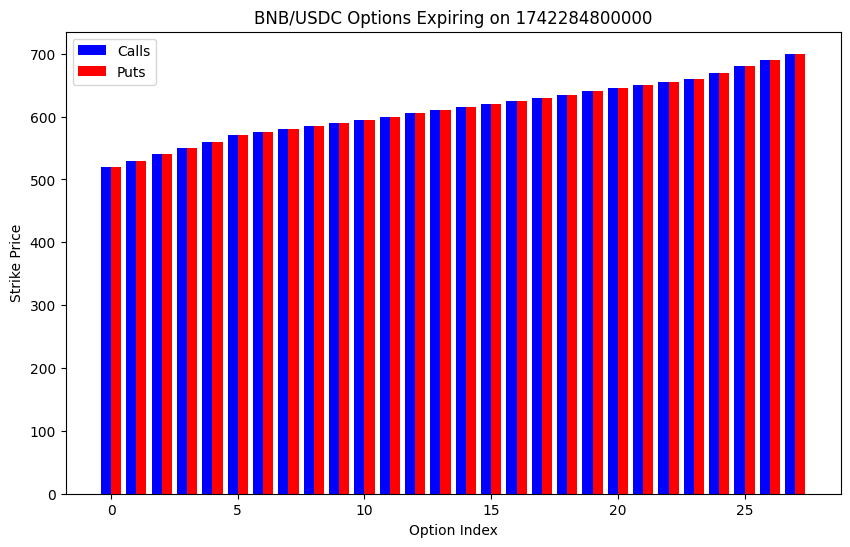

In [36]:
# now we'll plot one pair and expiry day
import matplotlib.pyplot as plt
import numpy as np

# Select the specific market and expiry
market = 'BNB/USDC'
expiry = 1742284800000

# Extract options for the selected market and expiry
options = filtered.get(market, {}).get(expiry, [])

# Separate strike prices for calls and puts
call_strikes = [opt['strike'] for opt in options if opt['optionType'] == 'call']
put_strikes = [opt['strike'] for opt in options if opt['optionType'] == 'put']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.4

# Set positions for the bars
indices = np.arange(len(call_strikes))

# Plot call options
ax.bar(indices - bar_width/2, call_strikes, bar_width, label='Calls', color='blue')

# Plot put options
ax.bar(indices + bar_width/2, put_strikes, bar_width, label='Puts', color='red')

# Set labels and title
ax.set_xlabel('Option Index')
ax.set_ylabel('Strike Price')
ax.set_title(f'BNB/USDC Options Expiring on {expiry}')
ax.legend()

# Show the plot
plt.show()